<a href="https://colab.research.google.com/github/MM21B038/High-Entropy-Alloy-Hardness-Prediction/blob/master/High_Entropy_Alloy_Hardness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Mo-Nb-Ta-W High Entropy Alloy Hardness Prediction

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression , Ridge
from math import degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from xgboost import XGBRegressor
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import cm

In [2]:
df = pd.read_excel('Data.xlsx')

In [3]:
df.head(5)

,Mo,Nb,Ta,W,sigma_T,x,y,reduced modulus,E_ROM,C11_ROM,C12_ROM,C44_ROM,shear_modulus_from_ROM,bulk_modulus_from_ROM,V_ROM,dV_ROM,HV_ROM,a_ROM,b_ROM,hardness
0,16.2,33.9,37.3,12.6,0.856579,-22.5,-40.5,107.54,210.057000,319.231400,151.456000,78.395000,81.094860,622.143400,17.659195,1.089679,1.453149,3.279638,2.840250,5.21
1,16.3,35.7,34.9,13.1,0.864383,-18.0,-40.5,108.01,209.867000,320.385100,151.206000,77.821000,81.134724,622.797100,17.645507,1.099951,1.474637,3.278777,2.839504,5.11
2,16.1,37.8,32.4,13.8,0.866180,-13.5,-40.5,113.82,209.431568,321.330370,150.963037,77.165834,81.075697,623.256444,17.635474,1.104662,1.499982,3.278149,2.838961,5.31
3,15.0,40.1,30.6,14.3,0.843410,-9.0,-40.5,113.59,207.144000,320.001000,150.522000,75.999000,80.250341,621.045000,17.650261,1.084048,1.516448,3.279092,2.839777,5.16
4,15.3,41.6,28.7,14.5,0.848367,-4.5,-40.5,118.49,206.787213,320.775325,150.217782,75.415584,80.195688,621.210889,17.638901,1.093896,1.529581,3.278375,2.839156,5.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mo                      311 non-null    float64
 1   Nb                      311 non-null    float64
 2   Ta                      311 non-null    float64
 3   W                       311 non-null    float64
 4   sigma_T                 311 non-null    float64
 5   x                       311 non-null    float64
 6   y                       311 non-null    float64
 7   reduced modulus         311 non-null    float64
 8   E_ROM                   311 non-null    float64
 9   C11_ROM                 311 non-null    float64
 10  C12_ROM                 311 non-null    float64
 11  C44_ROM                 311 non-null    float64
 12  shear_modulus_from_ROM  311 non-null    float64
 13  bulk_modulus_from_ROM   311 non-null    float64
 14  V_ROM                   311 non-null    fl

In [5]:
df.describe()

,Mo,Nb,Ta,W,sigma_T,x,y,reduced modulus,E_ROM,C11_ROM,C12_ROM,C44_ROM,shear_modulus_from_ROM,bulk_modulus_from_ROM,V_ROM,dV_ROM,HV_ROM,a_ROM,b_ROM,hardness
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,19.586495,36.501929,23.959164,19.953376,1.070883,-3.950161,1.012862,139.577235,229.337737,344.875162,154.539808,83.580456,89.172434,653.954779,17.418062,1.217163,1.675050,3.264436,2.827085,6.731447
std,5.142111,9.127435,7.423227,4.880274,0.169500,21.376500,23.770913,18.242299,18.370431,18.305545,3.591876,7.271472,7.213234,25.357898,0.169167,0.089683,0.131009,0.010686,0.009254,1.190694
min,9.800000,20.400000,12.500000,12.300000,0.703809,-45.000000,-40.500000,107.540000,190.904905,311.392192,146.572573,67.036000,74.363106,604.537337,17.048352,0.973772,1.434210,3.241080,2.806857,4.740000
25%,15.550000,28.850000,17.700000,16.000000,0.941291,-22.500000,-18.000000,125.255000,215.270000,329.281956,151.939000,78.331000,83.627293,633.842884,17.284759,1.154755,1.574368,3.255967,2.819750,5.770000
50%,19.000000,35.700000,22.600000,18.900000,1.077116,-4.500000,0.000000,134.340000,229.278000,343.285500,154.676677,83.891892,89.161130,652.489400,17.433177,1.236621,1.657227,3.265402,2.827921,6.530000
75%,23.350000,43.450000,29.300000,23.200000,1.214813,13.500000,22.500000,151.795000,243.578620,359.395612,157.262000,89.152069,94.873005,673.929486,17.559699,1.287176,1.768876,3.273371,2.834823,7.435000
max,31.300000,57.200000,42.000000,32.400000,1.373801,31.500000,45.000000,184.630000,267.214785,383.941359,161.964036,97.598402,104.182346,706.982318,17.725184,1.358824,1.983812,3.283860,2.843906,10.300000


In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
result_selection = {
    'Model':[],
    'Score':[],
    'RMSE':[]
}

## Multiple Linear Regression Model

In [10]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [11]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)
result_selection['Model'].append('Multiple Linear Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

0.873903571371657
0.3682725709565417


## Ridge Regression

In [12]:
regressor = Ridge(alpha=1)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [13]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8948537979699103
0.3362906367861297


In [14]:
result_selection['Model'].append('Ridge')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Polynomial Regression

In [15]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly,y_train)
y_pred = regressor.predict(poly_reg.transform(x_test))

In [16]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.6222156457105265
0.6374409570157469


In [17]:
result_selection['Model'].append('Polynomial(degree = 2)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

In [18]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly,y_train)
y_pred = regressor.predict(poly_reg.transform(x_test))

In [19]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

-42.630714056849605
6.85037176207415


In [20]:
result_selection['Model'].append('Polynomial(degree = 3)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Support Vector Regression

In [21]:
regressor = SVR()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [22]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9052807070091968
0.31918112735040516


In [23]:
result_selection['Model'].append('Support Vector Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Decision Tree Regression

In [24]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [25]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9060263524844019
0.31792232254845404


In [26]:
result_selection['Model'].append('Support Vector Regression')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Random Forest Regression Model

In [27]:
regressor = RandomForestRegressor(n_estimators=15, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [28]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9227372257456035
0.2882724436425871


In [29]:
result_selection['Model'].append('Random Forest (n = 15)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Artificial Neural Network

In [30]:
model = tf.keras.models.Sequential()

In [31]:
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [32]:
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 47.6199
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.1312
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.1105
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.3205
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.1093
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.3336
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6335
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9516
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3299
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3405
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1512
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5298
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9422
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5485
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.59

In [35]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [36]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8207916853759157
0.4390328917599307


In [37]:
result_selection['Model'].append('ANN')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## XGBoost Regression

In [38]:
regressor = model = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=15, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [39]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.8931301909045145
0.3390357515563548


In [40]:
result_selection['Model'].append('XGBoost')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Comparing Models

In [41]:
model_analysis = pd.DataFrame(result_selection)
model_analysis

,Model,Score,RMSE
0,Multiple Linear Regression,0.873904,0.368273
1,Ridge,0.894854,0.336291
2,Polynomial(degree = 2),0.622216,0.637441
3,Polynomial(degree = 3),-42.630714,6.850372
4,Support Vector Regression,0.905281,0.319181
5,Support Vector Regression,0.906026,0.317922
6,Random Forest (n = 15),0.922737,0.288272
7,ANN,0.820792,0.439033
8,XGBoost,0.893130,0.339036


## Increasing Best Model Accuracy

In [42]:
regressor = RandomForestRegressor()
n = [i for i in range(5,51)]
params = {
    'n_estimators': n,
    'random_state' : [42]
}
grid = GridSearchCV(estimator=regressor, param_grid=params, cv=10)

In [43]:
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)

In [44]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9239111191090498
0.2860741253321577


In [45]:
para = grid.best_params_
print(para)

{'n_estimators': 26, 'random_state': 42}


In [46]:
result_selection['Model'].append('Random Forest (n = 26)')
result_selection['Score'].append(score)
result_selection['RMSE'].append(rmse)

## Compairing Models

In [47]:
model_analysis = pd.DataFrame(result_selection)

In [48]:
model_analysis

,Model,Score,RMSE
0,Multiple Linear Regression,0.873904,0.368273
1,Ridge,0.894854,0.336291
2,Polynomial(degree = 2),0.622216,0.637441
3,Polynomial(degree = 3),-42.630714,6.850372
4,Support Vector Regression,0.905281,0.319181
5,Support Vector Regression,0.906026,0.317922
6,Random Forest (n = 15),0.922737,0.288272
7,ANN,0.820792,0.439033
8,XGBoost,0.893130,0.339036
9,Random Forest (n = 26),0.923911,0.286074


In [49]:
model_analysis.to_excel('models_comparision.xlsx')

In [50]:
regressor = RandomForestRegressor(n_estimators=26, random_state=42)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [51]:
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(score)
print(rmse)

0.9239111191090498
0.2860741253321577


## Graphical Analysis Important Features vs Target

In [52]:
importances = regressor.feature_importances_

In [53]:
df = df.drop('hardness',axis=1)

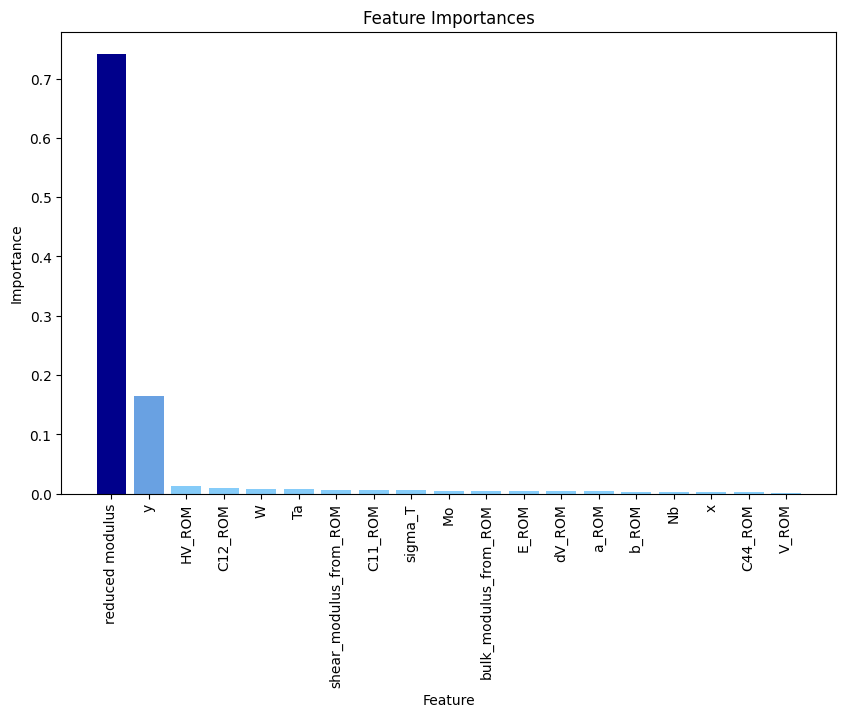

In [54]:
feature_names = df.columns
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Normalize the importances for color mapping
norm = Normalize(vmin=sorted_importances.min(), vmax=sorted_importances.max())

colors = LinearSegmentedColormap.from_list("blue_darkblue", ["#87CEFA", "#00008B"])
mapped_colors = colors(norm(sorted_importances))

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')

# Plot the bar chart with color variations
plt.bar(range(len(sorted_importances)), sorted_importances, color=mapped_colors, align='center')

# Set the feature names as x-ticks
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')

# Save the plot as a PNG file
plt.savefig('feature_importance.png')

# Show the plot
plt.show()

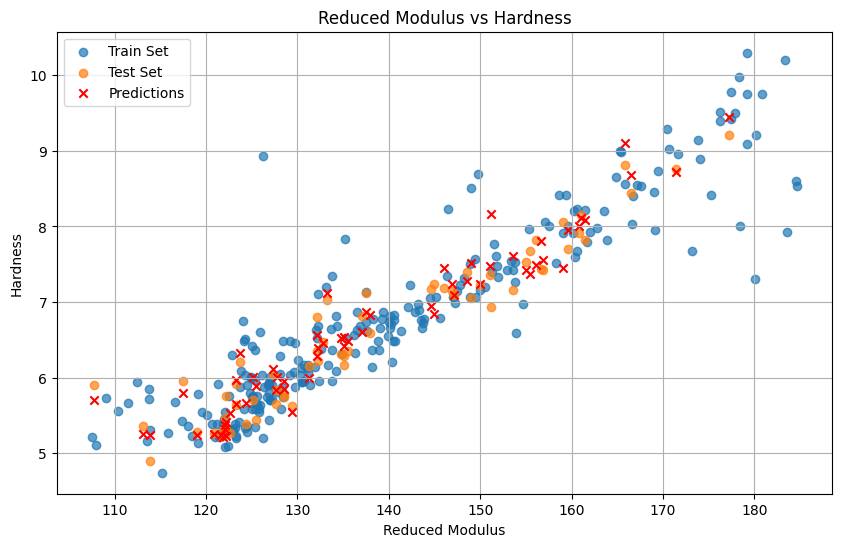

In [55]:
# 1. Reduced Modulus vs Hardness
plt.figure(figsize=(10, 6))
plt.scatter(sc.inverse_transform(x_train)[:, 7], y_train, label='Train Set', alpha=0.7) # Inverse transform the entire training set and extract the first column
plt.scatter(sc.inverse_transform(x_test)[:, 7], y_test, label='Test Set', alpha=0.7) # Inverse transform the entire test set and extract the first column
plt.scatter(sc.inverse_transform(x_test)[:, 7], y_pred, label='Predictions', marker='x', color='red') # Inverse transform the entire test set and extract the first column
plt.xlabel('Reduced Modulus')
plt.ylabel('Hardness')
plt.title('Reduced Modulus vs Hardness')
plt.legend()
plt.grid(True)
plt.savefig('scatter_plot_1.png')
plt.show()

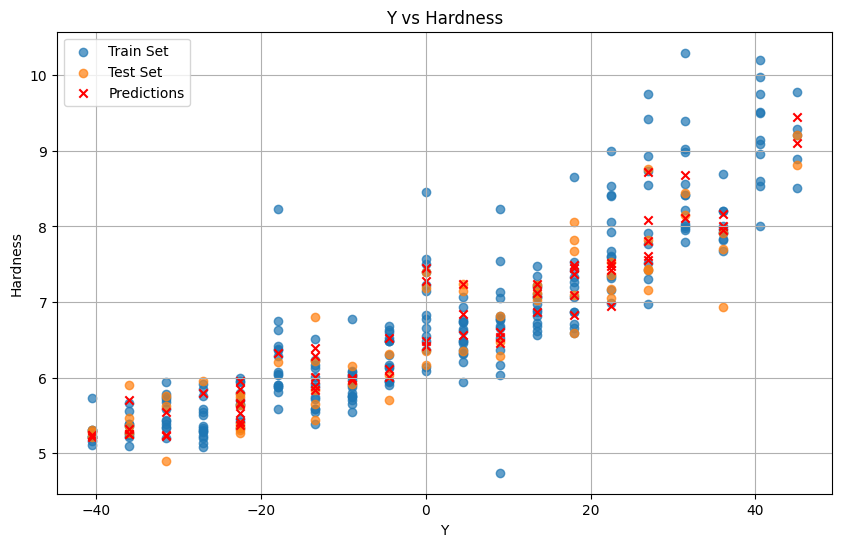

In [56]:
# 2. Y vs Hardness
plt.figure(figsize=(10, 6))
plt.scatter(sc.inverse_transform(x_train)[:, 6], y_train, label='Train Set', alpha=0.7) # Inverse transform the entire training set and extract the second column
plt.scatter(sc.inverse_transform(x_test)[:, 6], y_test, label='Test Set', alpha=0.7) # Inverse transform the entire test set and extract the second column
plt.scatter(sc.inverse_transform(x_test)[:, 6], y_pred, label='Predictions', marker='x', color='red') # Inverse transform the entire test set and extract the second column
plt.xlabel('Y')
plt.ylabel('Hardness')
plt.title('Y vs Hardness')
plt.legend()
plt.grid(True)
plt.savefig('scatter_plot_2.png')
plt.show()


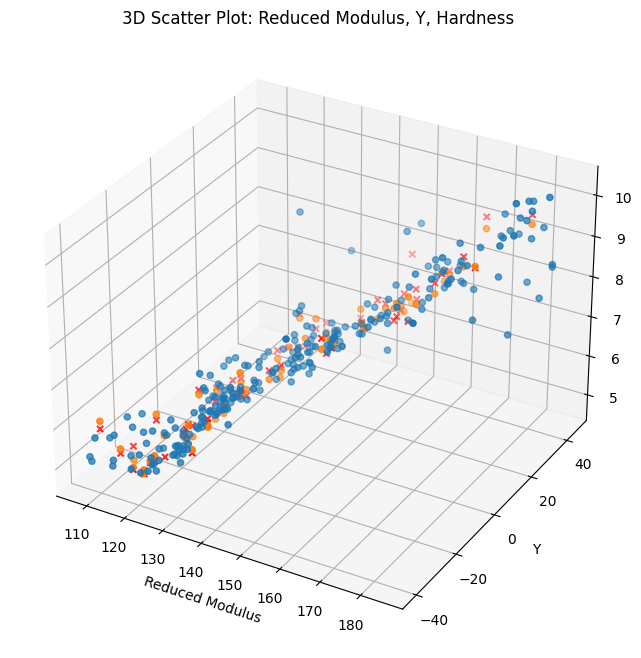

In [57]:
# 3. 3D graph with x-axis = reduced modulus, y-axis = Y, z-axis = hardness
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sc.inverse_transform(x_train)[:,7], sc.inverse_transform(x_train)[:,6], y_train, label='Train Set')
ax.scatter(sc.inverse_transform(x_test)[:,7], sc.inverse_transform(x_test)[:,6], y_test, label='Test Set')
ax.scatter(sc.inverse_transform(x_test)[:,7], sc.inverse_transform(x_test)[:,6], y_pred, c='red', marker='x', label='Predictions')
ax.set_xlabel('Reduced Modulus')
ax.set_ylabel('Y')
ax.set_zlabel('Hardness')
plt.title('3D Scatter Plot: Reduced Modulus, Y, Hardness')
plt.savefig('3d_scatter_plot_1.png')
plt.show()

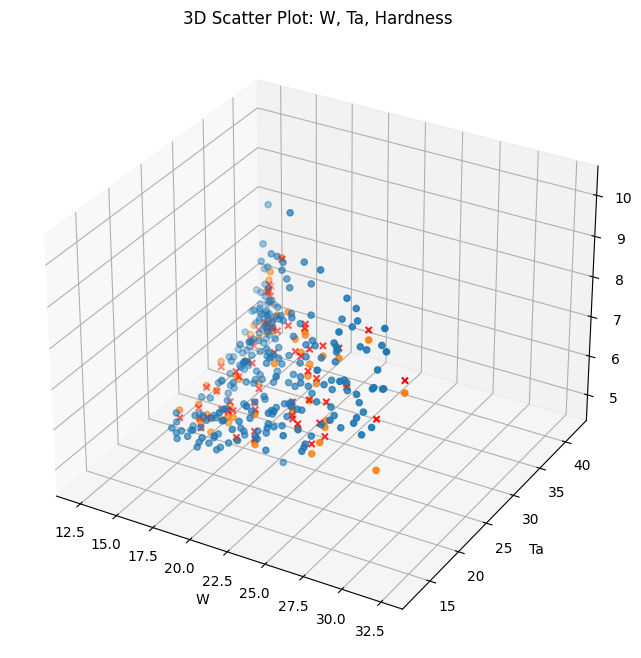

In [58]:
# 4. 3D graph with x-axis = W, y-axis = Ta, z-axis = hardness
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sc.inverse_transform(x_train)[:,3], sc.inverse_transform(x_train)[:,2], y_train, label='Train Set')
ax.scatter(sc.inverse_transform(x_test)[:,3], sc.inverse_transform(x_test)[:,2], y_test, label='Test Set')
ax.scatter(sc.inverse_transform(x_test)[:,3], sc.inverse_transform(x_test)[:,2], y_pred, c='red', marker='x', label='Predictions')
ax.set_xlabel('W')
ax.set_ylabel('Ta')
ax.set_zlabel('Hardness')
plt.title('3D Scatter Plot: W, Ta, Hardness')
plt.savefig('3d_scatter_plot_2.png')
plt.show()

In [59]:
df = pd.read_excel('Data.xlsx')

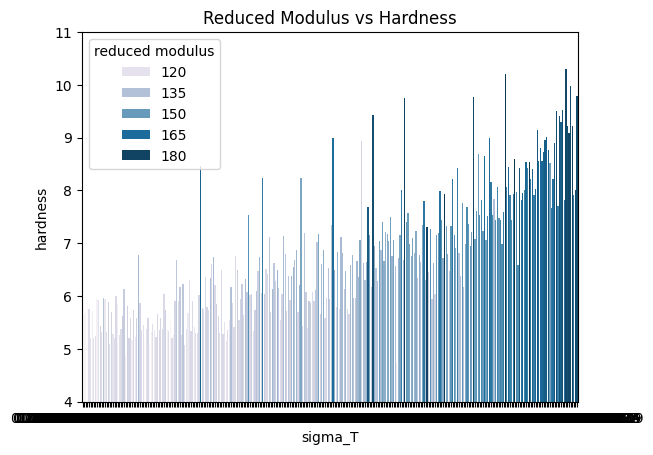

In [60]:
sns.barplot(x="sigma_T", y="hardness", hue="reduced modulus", data=df, palette="PuBu")
plt.title("Reduced Modulus vs Hardness")
plt.ylim(4,11)
plt.savefig('bar_plot_1.png')
plt.show()

<ipython-input-61-d7d098ae0bf8>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("PuBu")  # You can choose any colormap you prefer
<ipython-input-61-d7d098ae0bf8>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Distance from Diagonal Line')


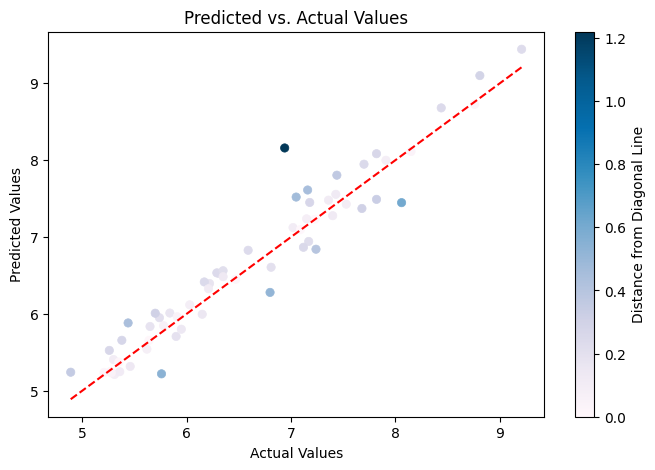

In [61]:
# Calculate residuals
residuals = y_pred - y_test

# Calculate absolute residuals to determine distance from the line
abs_residuals = np.abs(residuals)

# Normalize the residuals for color intensity (between 0 and 1)
norm_residuals = abs_residuals / np.max(abs_residuals)

# Create a colormap
cmap = plt.cm.get_cmap("PuBu")  # You can choose any colormap you prefer

# Map normalized residuals to colors
colors = cmap(norm_residuals)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=norm_residuals, palette="PuBu", legend=False, edgecolor=None)

# Diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Add a colorbar to show the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=np.max(abs_residuals)))
sm.set_array([])
plt.colorbar(sm, label='Distance from Diagonal Line')
plt.savefig('scatter_plot_3.png')
plt.show()

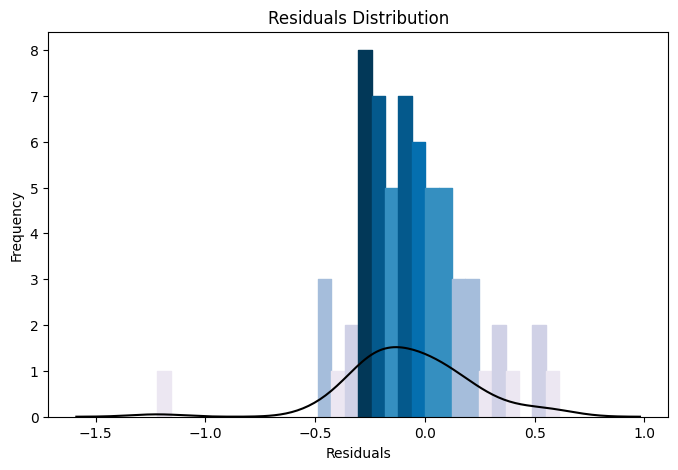

In [62]:
# Calculate residuals
residuals = y_test - y_pred

# Create the histogram manually
counts, bins = np.histogram(residuals, bins=30)

# Normalize the counts for color mapping
norm = Normalize(vmin=counts.min(), vmax=counts.max())

# Define a colormap
cmap = plt.cm.PuBu

plt.figure(figsize=(8, 5))

# Plot each bin with color intensity based on height
for count, left, right in zip(counts, bins[:-1], bins[1:]):
    plt.fill_between([left, right], 0, count, color=cmap(norm(count)))

# Add KDE (kernel density estimate)
sns.kdeplot(residuals, color='black')

plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('residuals_distribution.png')
plt.show()